## Modelo de Regresion Sklearn 

In [1]:
import sklearn
from sklearn.linear_model import LinearRegression
import warnings

In [2]:
model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


In [ ]:
# model.fit(X, y)
# model.coef_
# model.intercept_

In [ ]:
#plt.scatter(x, y)
#plt.plot(x, y)

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)


(112, 4)
(112,)
(38, 4)
(38,)


In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # 97% efectivo

0.9736842105263158

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Make blobs genera 100 puntos

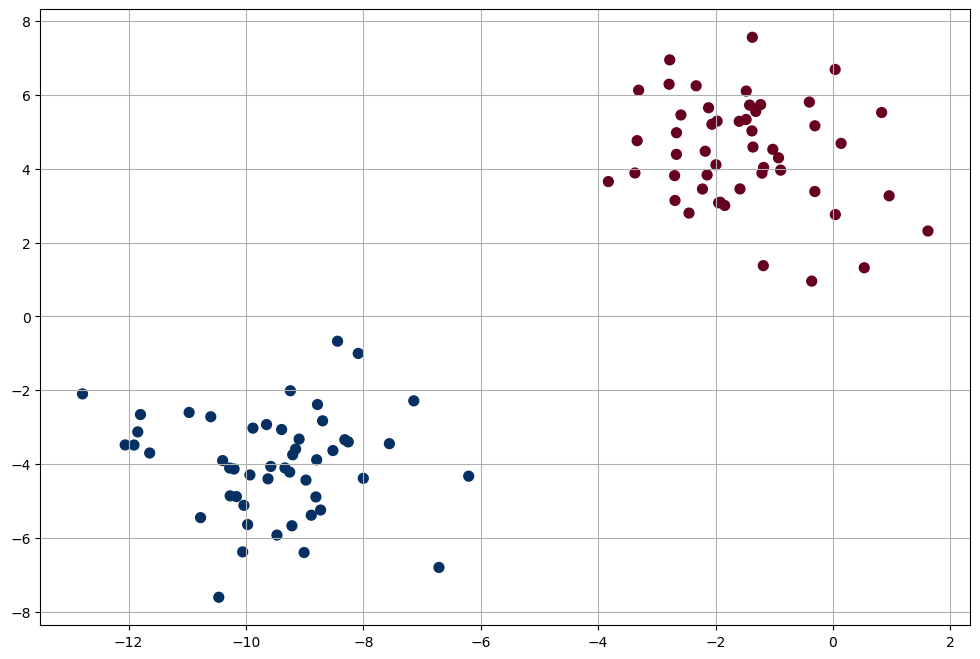

In [65]:
X, y = make_blobs(100, 2, centers=2, random_state=1, cluster_std=1.5)
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.grid()

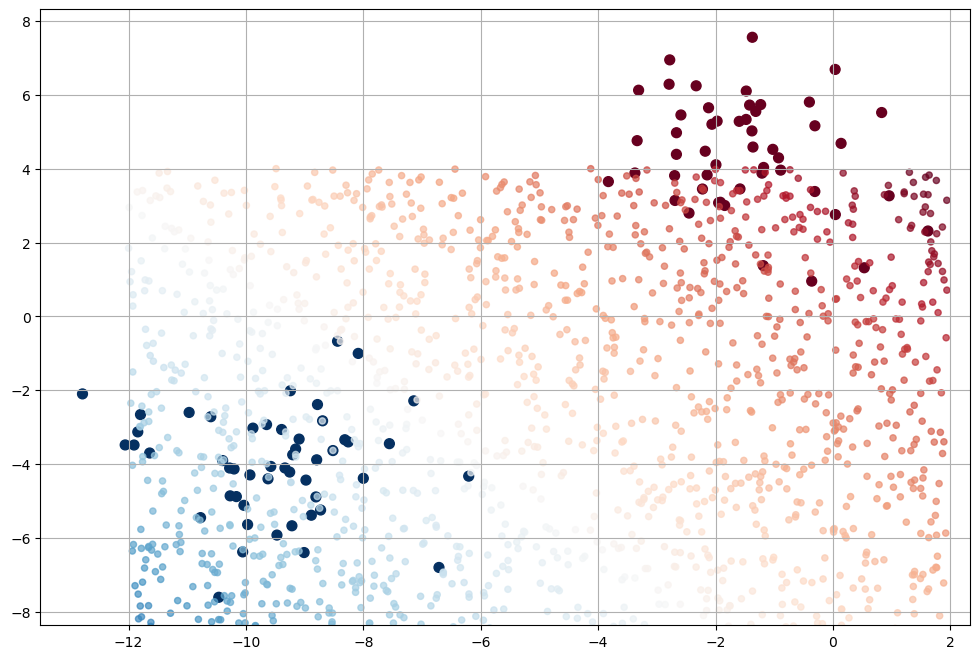

In [64]:
model.fit(X, y);
rng = np.random.RandomState(0)
Xnew = [-12, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.figure(figsize=(12, 8))
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu', alpha=0.7)
plt.axis(lim)
plt.grid()

Podemos medir la probabilidad calculada para cada y.

In [39]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.51, 0.49],
       [0.  , 1.  ]])

## Cuando usar Naive Bayes
Es un clasificador sencillo, poco potente, sus ventajas son:
- Muy rápido en entrenamiento y predicción
- Predicción probabilística
- Fácil de interpretar
- Sin parámetros
- Funciona bien en datos separados

## Regresión Lineal

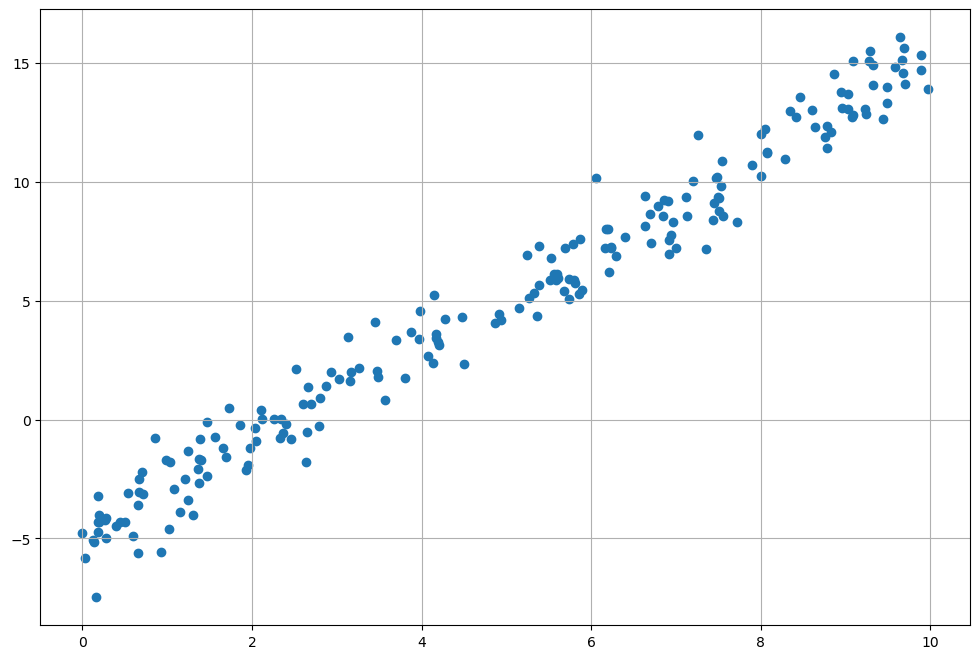

In [54]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(200)
y = 2* x - 5 + rng.randn(200)
plt.figure(figsize=(12, 8))
plt.scatter(x, y);
plt.grid()

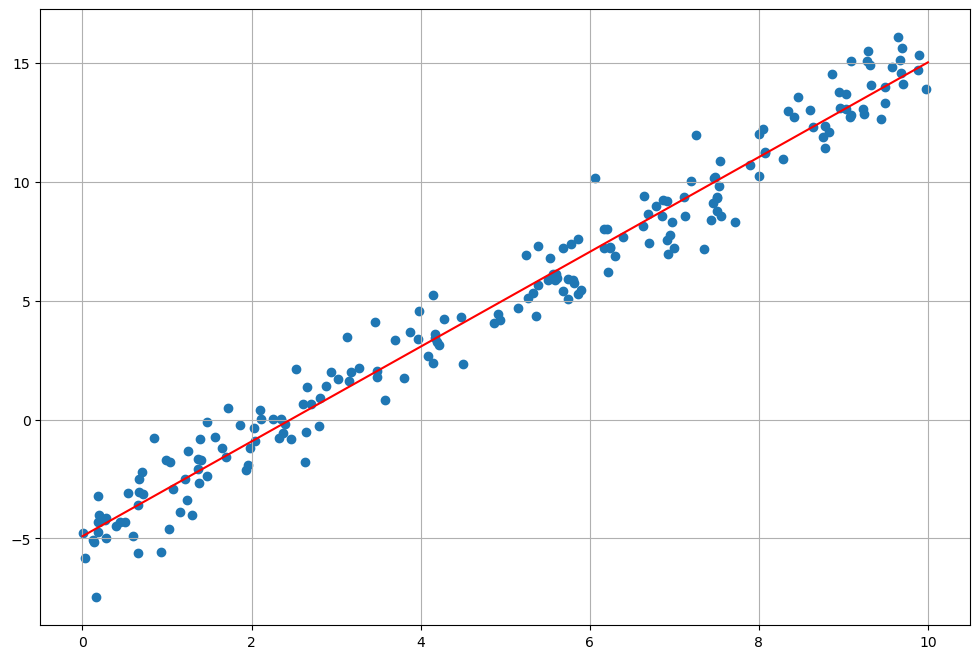

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.grid()
plt.plot(xfit, yfit, color='red');

In [57]:
print("Model intercept:", model.intercept_)
print("Model coef:", model.coef_[0])

Model intercept: -4.905685441023416
Model coef: 1.9940333531112462


## Support Vector Machine

Es un algoritmo de aprendizaje supervisado que se utiliza en problemas de clasificación <br>
y regresión. <br>
<br>
El objetivo del SVM es encontrar un hiperplano que separe "de la mejor forma <br>
posible". Implica el hiperplano el margen más amplio entre las dos clases. El margen <br>
se define como la anchura máxima de la región paralela al hiperplano. <br>
<br>
<br>
El algoritmo SVM estándar está formulado para problemas de clasificación binaria; <br>
los problemas multiclase normalmente se reducen a una serie de problemas binarios.

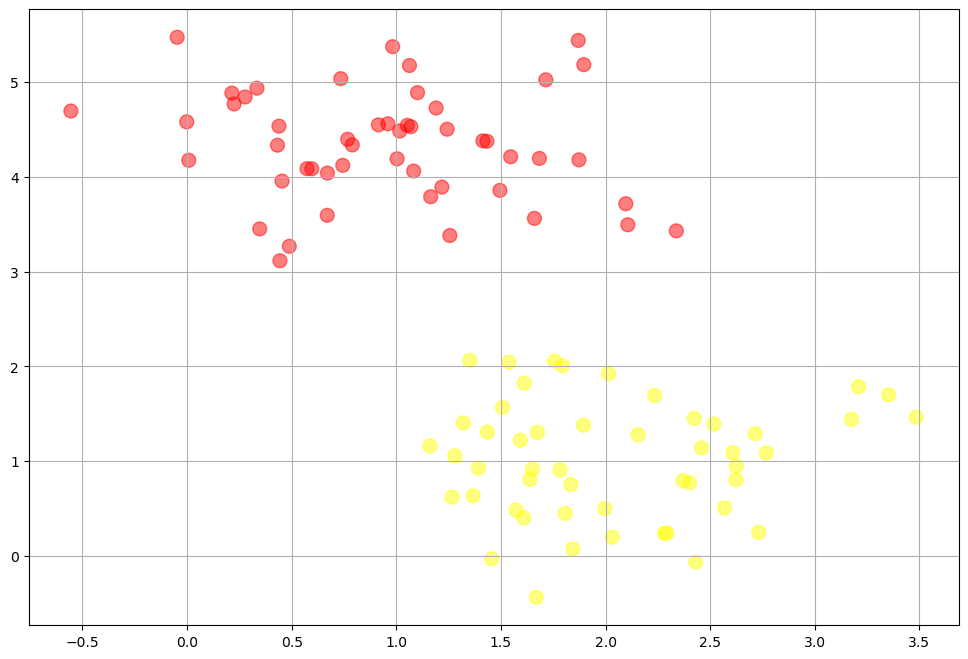

In [72]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn', alpha=0.5)
plt.grid()

In [73]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

Para visualizar el hiperplano podemos hacer lo siguiente:

In [100]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
        levels=[-1, 0, 1], alpha=0.5,
        linestyles=['--', '-', '--'])
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
                                        
                                            
                
    

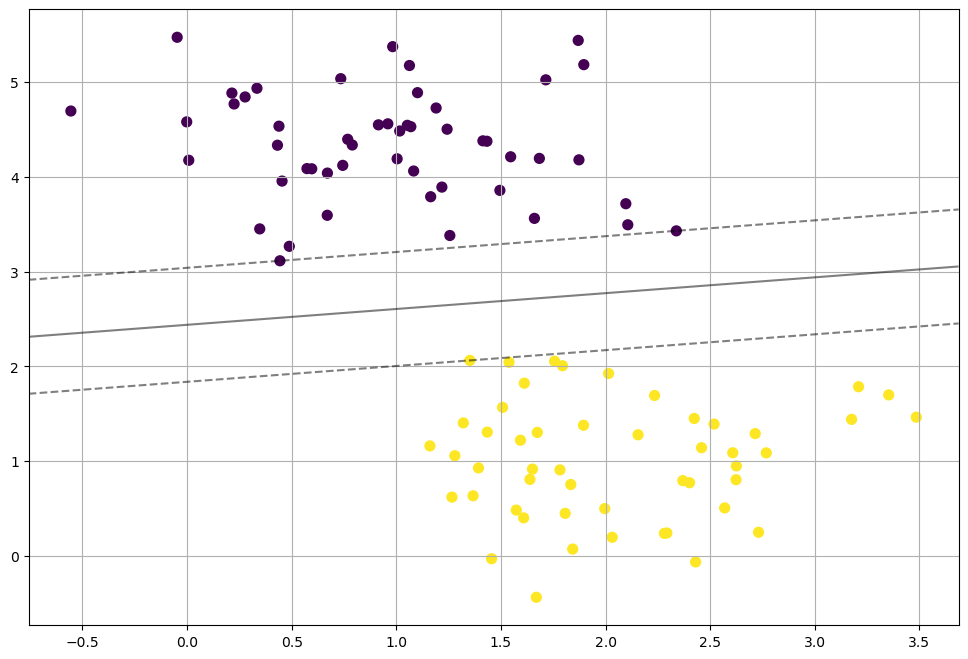

In [103]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.grid()
plot_svc_decision_function(model);

## Kernel SVM
Los kernel sirven para datos no linealmente separables

In [105]:
from sklearn.datasets import make_circles

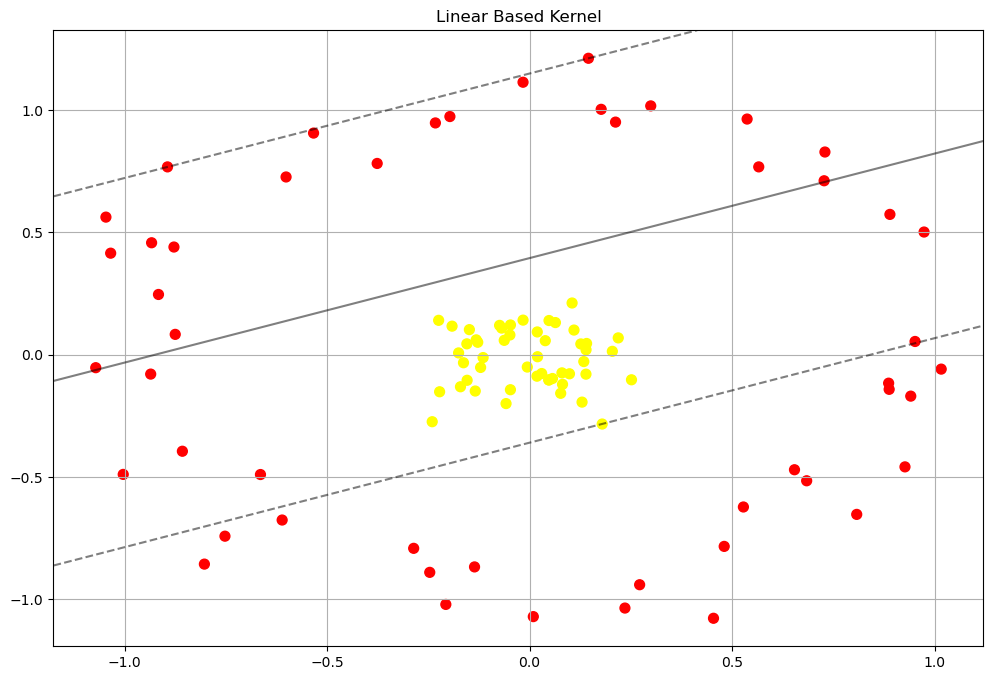

In [120]:
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Linear Based Kernel")
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.grid()
plot_svc_decision_function(clf, plot_support=False);

En lugar de un kernel lineal es posible usar uno en radianes

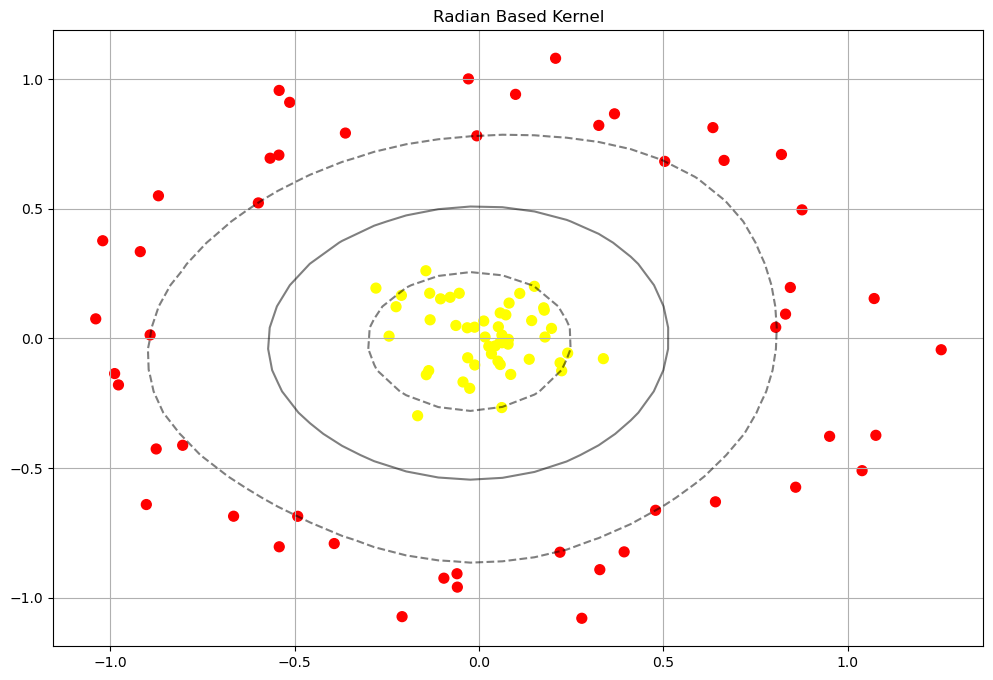

In [117]:
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='rbf').fit(X, y)
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Radian Based Kernel")
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.grid()
plot_svc_decision_function(clf, plot_support=False);

Si existe overlap utilizando SVM ejemplo:

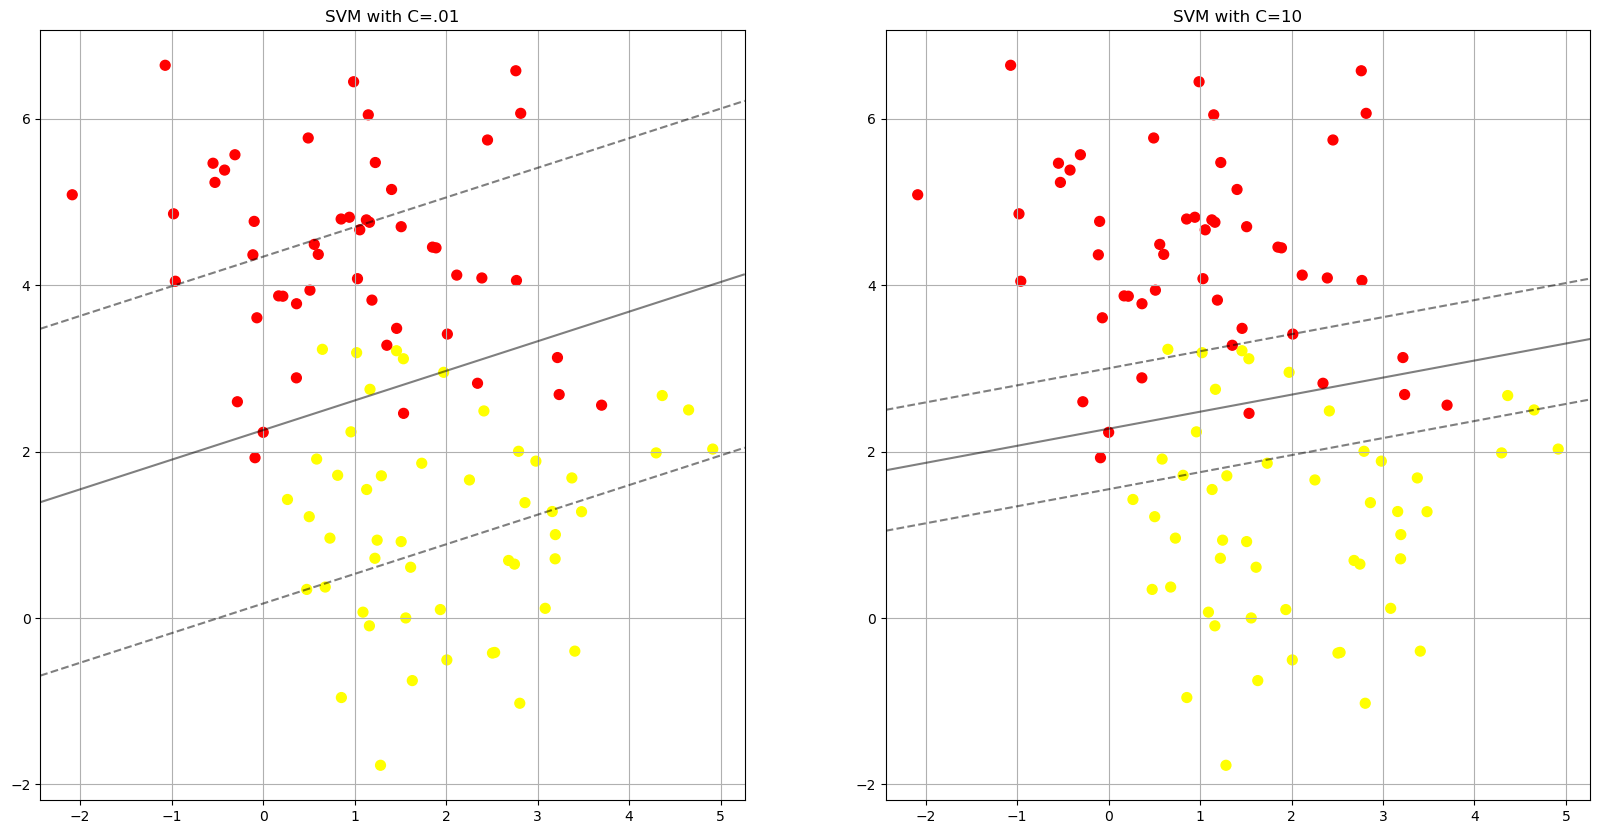

In [176]:

X1, y1 = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
fig, axs = plt.subplots(1, 2, figsize=(20, 10)) # Define el tamaño de la figura aquí y crea dos subplots

# Gráfico para el primer conjunto de datos
axs[0].scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn')
clf = SVC(kernel='linear', C=.01).fit(X1, y1)
plot_svc_decision_function(clf, ax=axs[0], plot_support=False) # Usa el primer eje
axs[0].set_title("SVM with C=.01")
axs[0].grid(True)
# Gráfico para el segundo conjunto de datos
axs[1].scatter(X1[:, 0], X1[:, 1], c=y2, s=50, cmap='autumn')
clf2 = SVC(kernel='linear', C=10).fit(X1, y1)
plot_svc_decision_function(clf2, ax=axs[1], plot_support=False) # Usa el segundo eje
axs[1].set_title("SVM with C=10")
axs[1].grid(True)
plt.show()

Para problemas con overlap es mejor utilizar un parametro C, menor para controlar el solapamiento de valores rangos <br>
más pequeños.

## Random Forest

Commonly used machine learning algorithm that combines the output of multiple decision trees to reach <br>
a single result. Its for classification problems.

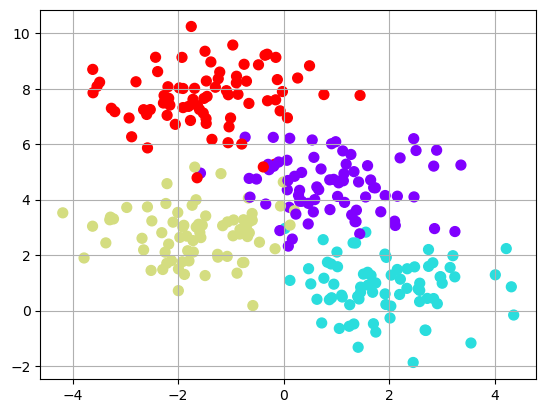

In [343]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.grid()

In [187]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'): 
    ax = ax or plt.gca() 
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3) 
    ax.axis('tight') 
    ax.axis('off') 
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    # fit the estimator
    model.fit(X, y) 
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
    # Create a color plot with the results
    n_classes = len(np.unique(y)) 
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), 
    y.max()), zorder=1) 
    ax.set(xlim=xlim, ylim=ylim)


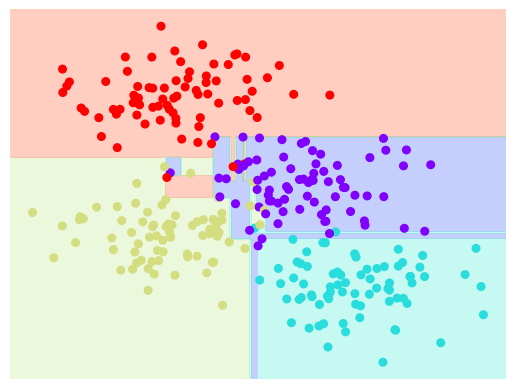

In [344]:
visualize_classifier(DecisionTreeClassifier(), X, y) 

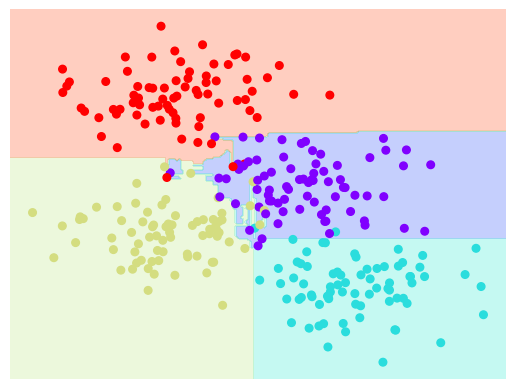

In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
warnings.filterwarnings('ignore')
tree = DecisionTreeClassifier() 
bag = BaggingClassifier(tree, n_estimators=100, 
max_samples=0.8, random_state=1) 
bag.fit(X, y) 
visualize_classifier(bag, X, y)

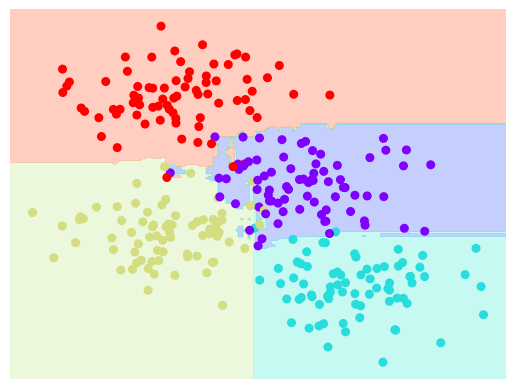

In [346]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100, random_state=0) 
visualize_classifier(model, X, y); 

Clasificando digitos

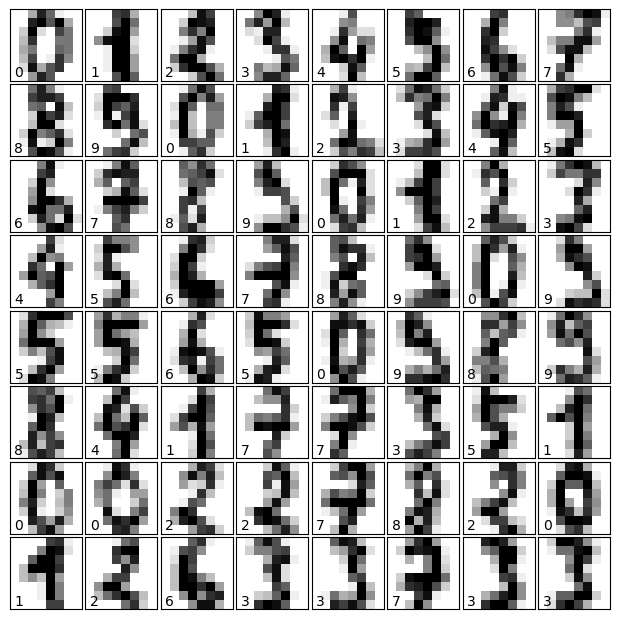

In [195]:
from sklearn.datasets import load_digits
digits = load_digits() 
digits.keys()
from sklearn.datasets import load_digits 
digits = load_digits() 
# set up the figure
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05) 
# plot the digits: each image is 8x8 pixels
for i in range(64): 
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[]) 
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest') 
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


In [196]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
random_state=0) 
model = RandomForestClassifier(n_estimators=1000) 
model.fit(Xtrain, ytrain) 
ypred = model.predict(Xtest)
from sklearn import metrics 
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [213]:
import numpy as np
import regex
mat

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  1, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 46]], dtype=int64)

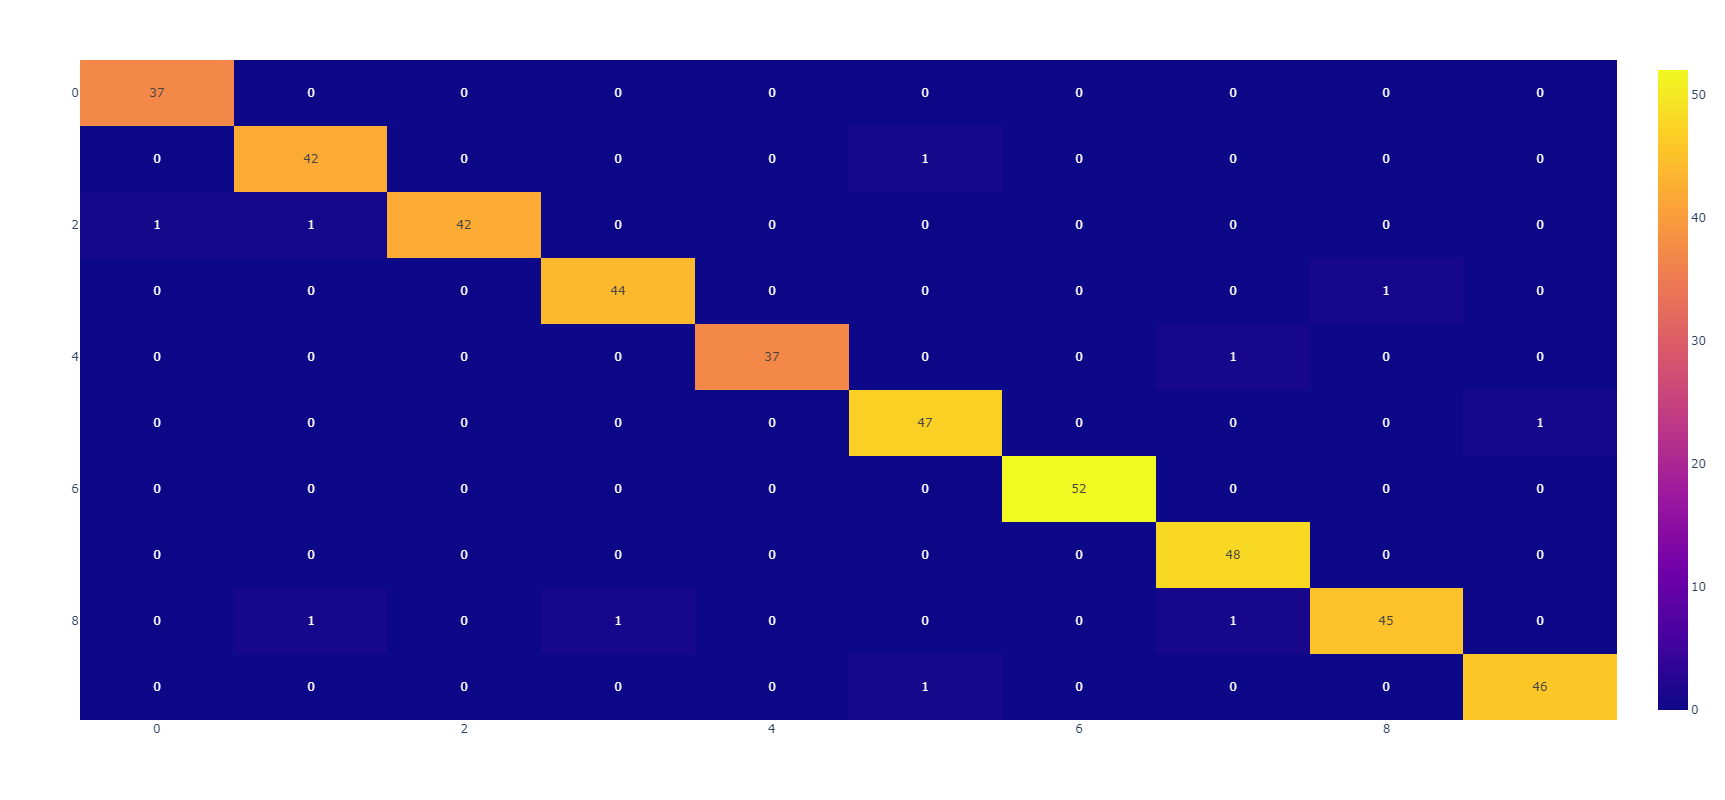

In [225]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
mat = confusion_matrix(ytest, ypred) 
fig = px.imshow(mat, text_auto=True, height=800, width=1000, aspect="auto")
fig
#sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True) 
#plt.xlabel('true label') 
#plt.ylabel('predicted label');


## Redes Neuronales
Para clasificación

In [227]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]] 
y = [0, 1] 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), 
random_state=1) 
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [229]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

## Clustering
### PCA
Es un algoritmo de la reducción de dimensiones, con aplicacione de <br>
visualización, filtrado de ruido, feature engineering...

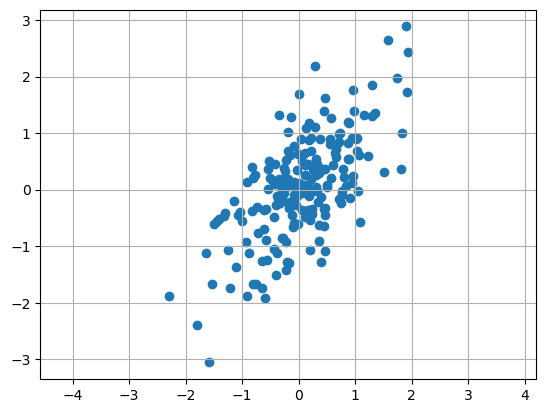

In [258]:
rng = np.random.RandomState(10)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
plt.axis('equal');

In [261]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [260]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.60247767 -0.79813574]
 [ 0.79813574 -0.60247767]]
[1.16916171 0.22345098]


Visualización vectores ortogonales de PCA.

In [254]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

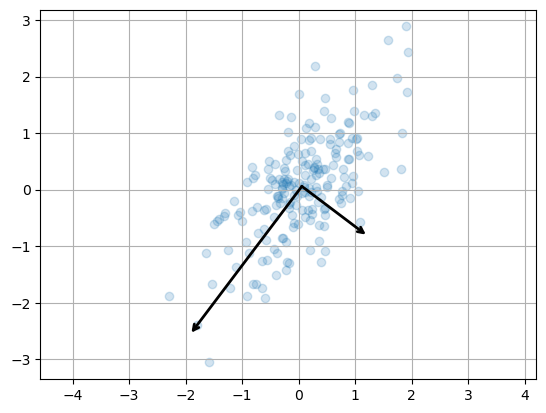

In [262]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.grid()
plt.axis('equal');

Componentes elegidos maximizan la varianza

In [264]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Original shape: (200, 2)
Transformed shape: (200, 1)


Reduccion a un sóla dimensión.

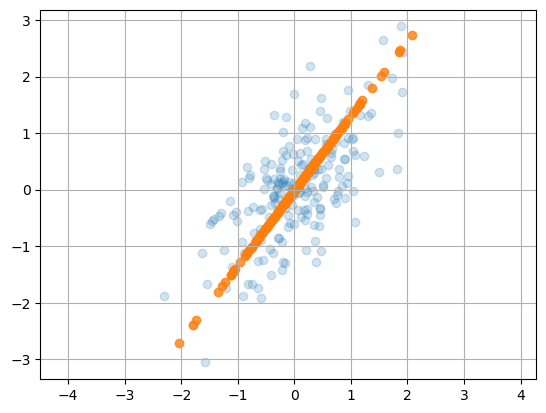

In [266]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.grid()
plt.axis('equal');

In [267]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape # 64 dimensiones

(1797, 64)

In [269]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


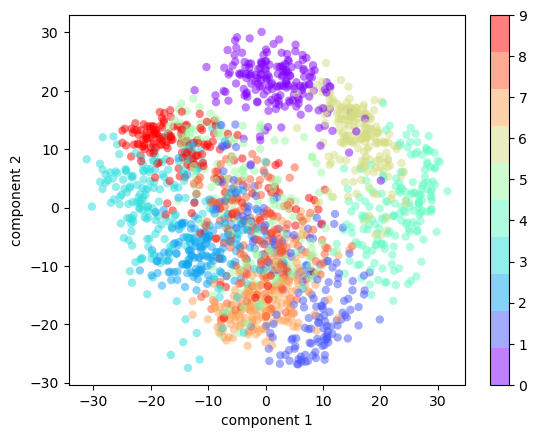

In [340]:
warnings.filterwarnings('ignore')
plt.scatter(projected[:, 0], projected[:,1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

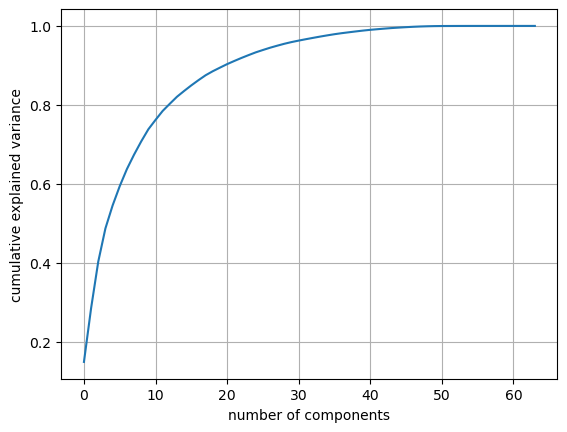

In [272]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## K-Means
from scratch

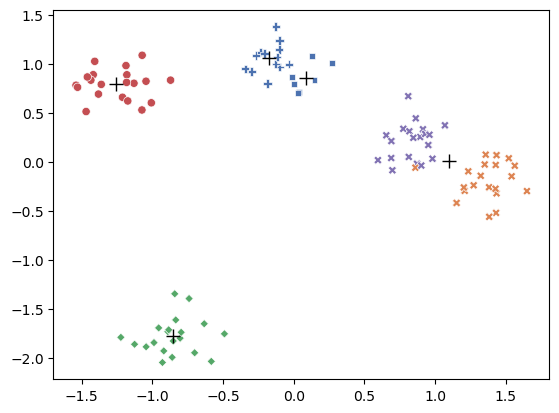

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs
# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()

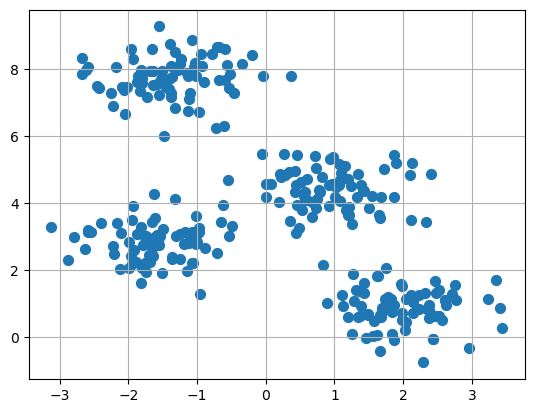

In [319]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.grid()
plt.scatter(X[:,0], X[:,1], s=50);

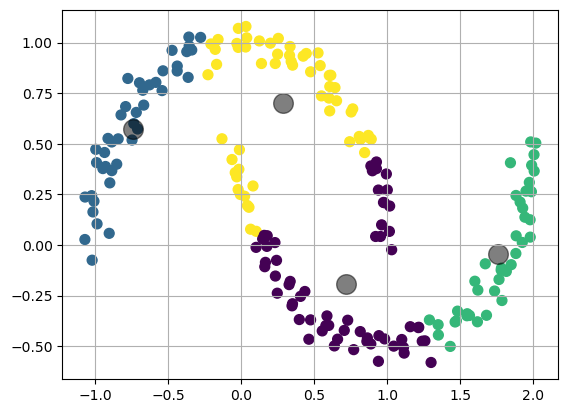

In [339]:
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.grid()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

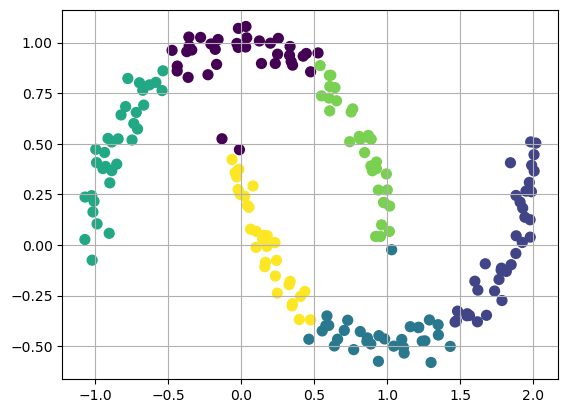

In [338]:
warnings.filterwarnings('ignore')
labels = KMeans(6, random_state=0).fit_predict(X)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap=
'viridis'); #Numero de clusters manual erroneo

## Problema de fronteras lineales

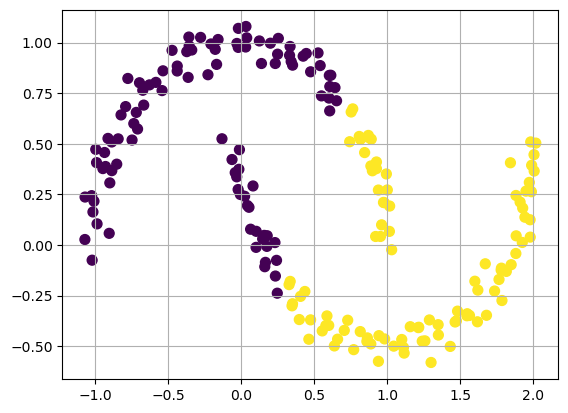

In [337]:
from sklearn.datasets import make_moons
warnings.filterwarnings('ignore')
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

## Transformación de Kernel: SpectralClustering
No basado en distancia euclidea sino en vecinos cercanos

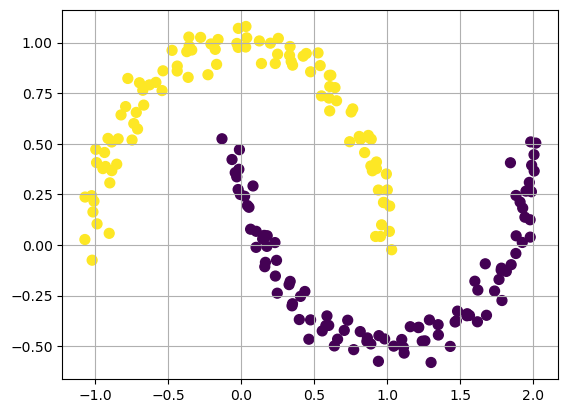

In [336]:
from sklearn.cluster import SpectralClustering
warnings.filterwarnings('ignore')
model = SpectralClustering(n_clusters=2,
affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
